In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

%matplotlib inline
#importing required libraries

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
recomd=pd.read_csv(
    ,names=['userId','productId','Rating','timestamp'])
recomd=pd.DataFrame(recomd)
recomd.head()

,userId,productId,Rating,timestamp
0,A2XVJBSRI3SWDI,0000031887,5.0,1383523200
1,A2G0LNLN79Q6HR,0000031887,4.0,1337990400
2,A2R3K1KX09QBYP,0000031887,2.0,1361059200
3,A19PBP93OF896,0000031887,1.0,1363824000
4,A1P0IHU93EF9ZK,0000031887,4.0,1390435200


In [ ]:
print(recomd.info())
print("\nShape of Data:",recomd.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748920 entries, 0 to 5748919
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   Rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 175.4+ MB
None

Shape of Data: (5748920, 4)


In [ ]:
recomd.drop(['timestamp'],inplace=True,axis=1)

In [ ]:
recomd.isnull().sum()   

userId       0
productId    0
Rating       0
dtype: int64

In [ ]:
recomd.describe()

,Rating
count,5.748920e+06
mean,4.144679e+00
std,1.233103e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [ ]:
print("Unique Customers: ",recomd.userId.nunique())
print("Unique Products: ",recomd.productId.nunique())

Unique Customers:  3117268
Unique Products:  1136004


In [ ]:
data_user_rate=pd.DataFrame(recomd.groupby('userId')['Rating'].agg(['mean','count']),
                            columns=['mean','count']).sort_values(by=['count','mean'],ascending=False)[:20]
data_user_rate.head(20)


,mean,count
userId,,
A3W4D8XOGLWUN5,3.633238,349
A5QQRB2QOY96U,3.238754,289
A2KBV88FL48CFS,4.820144,278
A1Z4LX3Q1YMF84,4.500000,274
A1RRMZKOMZ2M7J,3.362934,259
A2J4XMWKR8PPD0,4.992188,256
A2EA0JE6LV4BXH,4.851406,249
A2GA55P7WGHJCP,3.912500,240
A1XQ0F01CF84Y3,4.906667,225


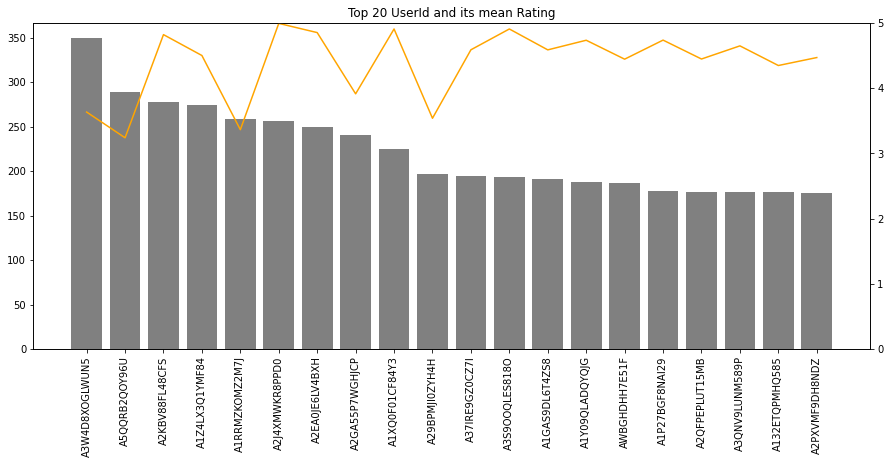

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.bar(data_user_rate.index,data_user_rate['count'],color='grey')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
ax2.plot(data_user_rate.index,data_user_rate['mean'],color='orange')
plt.ylim(0, 5)
plt.title("Top 20 UserId and its mean Rating")
plt.show()

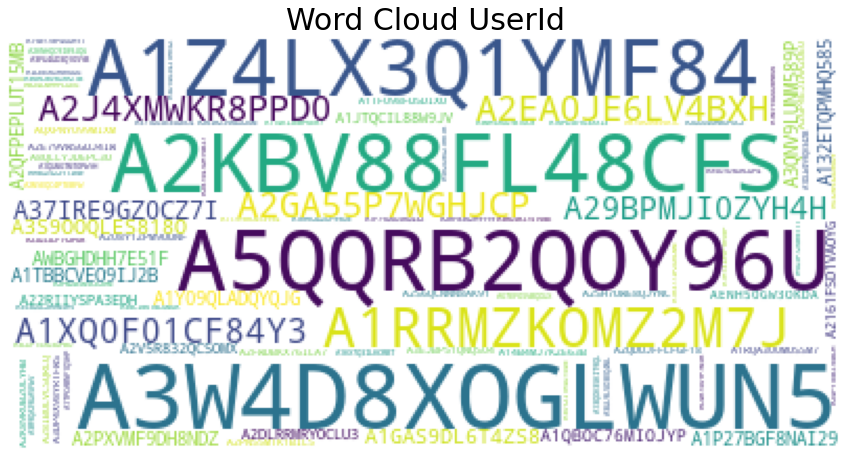

In [ ]:
from wordcloud import WordCloud
data_user_word=recomd.groupby('userId').size().sort_values(ascending=False)
data_user_word.index = data_user_word.index.map(str)
wordcloud = WordCloud(background_color='white',random_state=1).generate_from_frequencies(data_user_word)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud UserId",size=30)
plt.show()

In [ ]:
data_prod_rate=pd.DataFrame(recomd.groupby('productId')['Rating'].agg(['mean','count']),
                            columns=['mean','count']).sort_values(by=['count','mean'],ascending=False)[:20]
data_prod_rate.head(20)

,mean,count
productId,,
B0058XIMMM,4.667214,3047
B000FBO0DM,4.452045,2836
B000NZW3J8,4.521630,2797
B005LERHD8,4.024092,2781
B006PGGJOE,4.152542,2773
B000T9VK56,3.609683,2685
B00012O12A,3.682927,2214
B0000C321X,3.961045,2105
B000O32MLI,4.403500,2057


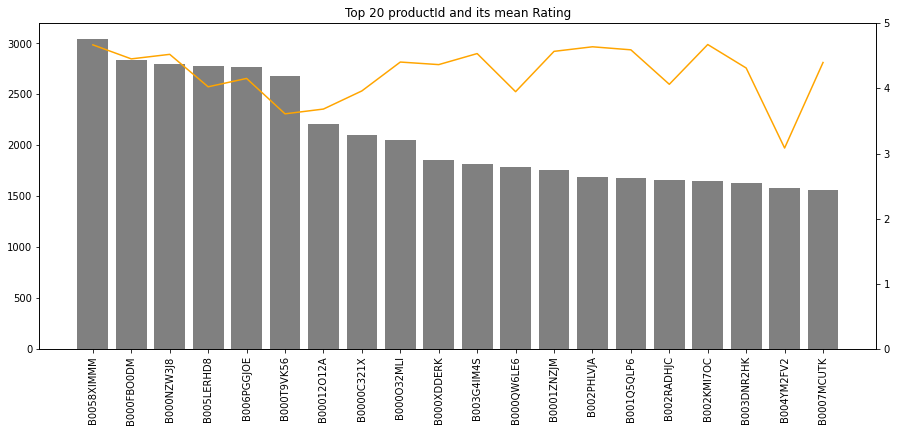

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.bar(data_prod_rate.index,data_prod_rate['count'],color='grey')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
ax2.plot(data_prod_rate.index,data_prod_rate['mean'],color='orange')
plt.ylim(0, 5)
plt.title("Top 20 productId and its mean Rating")
plt.show()

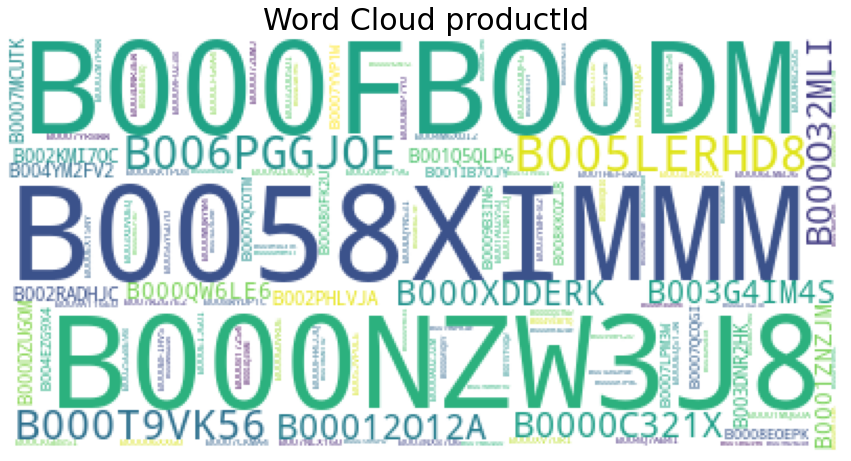

In [ ]:
data_prod_word=recomd.groupby('productId').size().sort_values(ascending=False)
data_prod_word.index = data_prod_word.index.map(str)
wordcloud = WordCloud(background_color='white',random_state=2).generate_from_frequencies(data_prod_word)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud productId",size=30)
plt.show()

5.0    3303450
4.0    1120583
3.0     574597
1.0     396523
2.0     353767
Name: Rating, dtype: int64


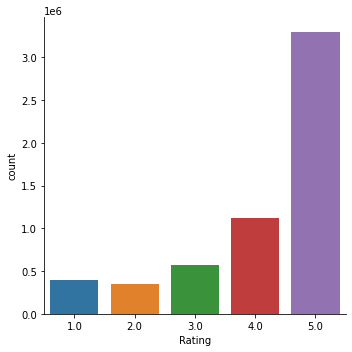

In [ ]:
print(recomd.Rating.value_counts())
sns.catplot("Rating",data=recomd,kind='count')

In [ ]:
print(recomd.shape)

(5748920, 3)


In [ ]:
print("Unique Customers: ",recomd.userId.nunique())
print("Unique Products: ",recomd.productId.nunique())

Unique Customers:  3117268
Unique Products:  1136004


In [ ]:
print("Mean of Rating:",np.mean(recomd.Rating))
#Median of Rating
print("Median of Rating:",np.median(recomd.Rating))

Mean of Rating: 4.14467934846893
Median of Rating: 5.0


In [ ]:
data_flt=recomd.userId.value_counts() 
data_flt.head()#returns objects containing  counts of unique values

A3W4D8XOGLWUN5    349
A5QQRB2QOY96U     289
A2KBV88FL48CFS    278
A1Z4LX3Q1YMF84    274
A1RRMZKOMZ2M7J    259
Name: userId, dtype: int64

In [ ]:
#data_flt[data_flt.values>=10].index.shape

In [ ]:
data_final=recomd[recomd['userId'].isin(data_flt[data_flt>=50].index)]   #user giving more than 50 reviews

In [ ]:
data_final.shape

(49991, 3)

In [ ]:
print("No of users giving rating for atleast 50 products:",(len(data_final)/len(recomd))*100)  #percentage
print(len(recomd))

No of users giving rating for atleast 50 products: 0.8695720239627617
5748920


5.0    30218
4.0     9946
3.0     5388
2.0     2641
1.0     1798
Name: Rating, dtype: int64


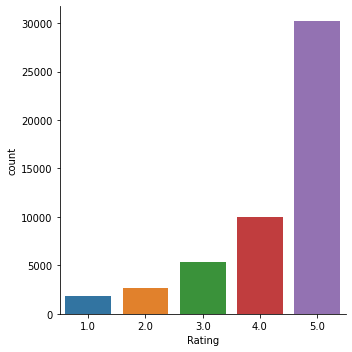

In [ ]:
print(data_final.Rating.value_counts())
sns.catplot("Rating",data=data_final,kind='count')

In [ ]:
#No of unique customers and products
print("Unique Customers: ",data_final.userId.nunique())
print("Unique Products: ",data_final.productId.nunique())

Unique Customers:  690
Unique Products:  44893


In [ ]:
data_flt_prod=data_final.productId.value_counts()

In [ ]:
print("Mean of Rating:",np.mean(data_final.Rating))
#Median of Rating
print("Median of Rating:",np.median(data_final.Rating))

Mean of Rating: 4.283130963573443
Median of Rating: 5.0


In [ ]:
data_final_1=data_final[data_final['productId'].isin(data_flt_prod[data_flt_prod>=1].index)]

In [ ]:
data_final_1.groupby('productId').size().sort_values(ascending=False)

productId
B005GYGD7O    17
B008NCYALM    15
B007WA3K4Y    13
B008WYDP1C    12
B003DHSE6O    11
              ..
B004RECZ44     1
B004REJLMI     1
B004RELEPU     1
B004RETTZC     1
B006UH8SG0     1
Length: 44893, dtype: int64

In [ ]:
data_final_1.head(10)

,userId,productId,Rating
44,A1RLQXYNCMWRWN,0000031887,5.0
445,A1F7YU6O5RU432,1608299953,5.0
467,A1R377IPZOKLMM,1608299953,5.0
601,AN81JUYW2SL24,1617160377,4.0
849,A2THIXG7X5T53F,500000003X,5.0
1457,A1VQSFKF00KOQ3,B00001TQ34,3.0
1650,AJGU56YG8G1DQ,B00001W0J3,5.0
2074,AR75HZA85VATC,B000034DKV,5.0
2765,A22GHD1G3OQTED,B00004SR9P,5.0
3718,A1Z54EM24Y40LL,B0000535SI,5.0


In [ ]:
print("A user rated atleast 50 times and each product is rated atleast 1 time:"
      ,(len(data_final_1)/len(recomd))*100)

A user rated atleast 50 times and each product is rated atleast 1 time: 0.8695720239627617


In [ ]:
print("Mean of Rating:",np.mean(data_final_1.Rating))
#Median of Rating
print("Median of Rating:",np.median(data_final_1.Rating))

Mean of Rating: 4.283130963573443
Median of Rating: 5.0


5.0    30218
4.0     9946
3.0     5388
2.0     2641
1.0     1798
Name: Rating, dtype: int64


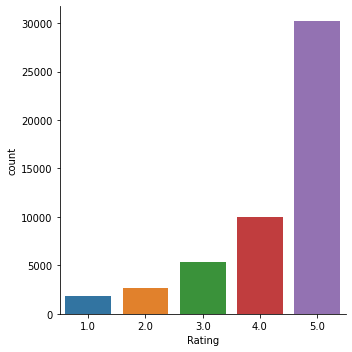

In [ ]:
print(data_final_1.Rating.value_counts())
sns.catplot("Rating",data=data_final_1,kind='count')

In [ ]:
print(data_final_1.shape)

(49991, 3)


In [ ]:
print("Unique Customers: ",data_final_1.userId.nunique()) 
print("Unique Products: ",data_final_1.productId.nunique()) 

Unique Customers:  690
Unique Products:  44893


In [ ]:
final_ratings_matrix = pd.pivot_table(data_final_1,index='userId',columns='productId',values = 'Rating').fillna(0)
final_ratings_matrix.head(5)

productId,0000031887,1608299953,1617160377,500000003X,B00001TQ34,B00001W0J3,B000034DKV,B00004SR9P,B0000535SI,B00005LILM,...,B00LK09U3M,B00LK0IQGY,B00LLHU588,B00LMH3SHW,B00LMQCBVC,B00LOP5Q6I,B00LSTNH7U,B00LSTZKZ2,B00LT05HAS,B00LU0ZXJM
userId,,,,,,,,,,,,,,,,,,,,,
A1084V41BP7RDH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10QCZUQ53TNRP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10VVD2S6W6ICO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A110M2KRZB0IS3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A114KIJEBP6ER7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}'.format(density))

given_num_of_ratings =  49991
possible_num_of_ratings =  30976170
density: 0.16


In [ ]:
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T.head()

userId,A1084V41BP7RDH,A10QCZUQ53TNRP,A10VVD2S6W6ICO,A110M2KRZB0IS3,A114KIJEBP6ER7,A118V341FMA1EL,A11FX8HL2ANK6T,A11WYHDB1YEZOX,A11YOTONCPRQ9S,A125XVN95UDZWO,...,AY09Z9FC78C1E,AY2STG2K6EAUY,AY9ZBOTKBA30N,AYB4ELCS5AM8P,AYIAQMSRNOX0L,AYLP7ID186M3Q,AYOMAHLWRQHUG,AYPNGOM0K783G,AZ9VR9ESKVJEV,AZC097NSZCUQ8
productId,,,,,,,,,,,,,,,,,,,,,
0000031887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1608299953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1617160377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500000003X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00001TQ34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
#Split the data randomnly into test and train datasets
#Split the training and test data in the ratio 70:30
train_data, test_data = train_test_split(data_final_1, test_size = 0.3, random_state=10)
train_data.head() 

,userId,productId,Rating
5548513,A1KHK2DZOF99ON,B00G3YJW10,5.0
4627396,A39E7IWNHY62JT,B00AHAH9P2,5.0
4277430,A1YW778P40UHY1,B00905C0MC,5.0
836228,A1GAS9DL6T4ZS8,B000YDL69C,2.0
5370611,AT4WWKZKHZ649,B00EEDK5FE,4.0


In [ ]:
print(train_data.shape)
print(test_data.shape)

(34993, 3)
(14998, 3)


In [ ]:
train_data_grouped = train_data.groupby('productId').agg({'userId':'count','Rating':'mean'}).reset_index() #replacing
train_data_grouped.rename(columns={'userId':'count','Rating':'mean'},inplace=True)
train_data_grouped.head(10)

,productId,count,mean
0,1608299953,1,5.0
1,1617160377,1,4.0
2,500000003X,1,5.0
3,B00001W0J3,1,5.0
4,B00005LILM,1,5.0
5,B0000643Q6,1,5.0
6,B00006XXGO,1,5.0
7,B000072UMJ,2,5.0
8,B000074RL3,1,5.0
9,B0000755EF,1,5.0


In [ ]:
train_data_sort = train_data_grouped.sort_values(['count'], ascending = 0) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['count'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,productId,count,mean,Rank
18197,B007WA3K4Y,12,4.583333,1.0
13884,B005GYGD7O,10,4.500000,2.0
20297,B008NCYALM,9,3.444444,3.0
9901,B0047RS43C,9,4.333333,4.0
5177,B0026P45QW,8,4.625000,5.0


In [ ]:
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1]
     
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [ ]:
find_recom = [1267,385,40]   # This list is user choice. # user-id
for i in find_recom:
    print("Here is the recommendation for the userId: ", i)
    print("The products are most sold along with their mean rating:\n")
    print(recommend(i))    
    print("\n")

Here is the recommendation for the userId:  1267
The products are most sold along with their mean rating:

       userId   productId  count      mean  Rank
18197    1267  B007WA3K4Y     12  4.583333   1.0
13884    1267  B005GYGD7O     10  4.500000   2.0
20297    1267  B008NCYALM      9  3.444444   3.0
9901     1267  B0047RS43C      9  4.333333   4.0
5177     1267  B0026P45QW      8  4.625000   5.0


Here is the recommendation for the userId:  385
The products are most sold along with their mean rating:

       userId   productId  count      mean  Rank
18197     385  B007WA3K4Y     12  4.583333   1.0
13884     385  B005GYGD7O     10  4.500000   2.0
20297     385  B008NCYALM      9  3.444444   3.0
9901      385  B0047RS43C      9  4.333333   4.0
5177      385  B0026P45QW      8  4.625000   5.0


Here is the recommendation for the userId:  40
The products are most sold along with their mean rating:

       userId   productId  count      mean  Rank
18197      40  B007WA3K4Y     12  4.58333

In [ ]:
train_final_ratings_matrix = pd.pivot_table(train_data,index='userId',columns='productId',values = 'Rating').fillna(0)
test_final_ratings_matrix = pd.pivot_table(test_data,index='userId',columns='productId',values = 'Rating').fillna(0)
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0], 1)
train_final_ratings_matrix['user_index'] = np.arange(0, train_final_ratings_matrix.shape[0], 1)
train_final_ratings_matrix.head(10)

productId,1608299953,1617160377,500000003X,B00001W0J3,B00005LILM,B0000643Q6,B00006XXGO,B000072UMJ,B000074RL3,B0000755EF,...,B00LJ2GPNO,B00LJXK3HM,B00LJYA2ZY,B00LLHU588,B00LOP5Q6I,B00LSTNH7U,B00LSTZKZ2,B00LT05HAS,B00LU0ZXJM,user_index
userId,,,,,,,,,,,,,,,,,,,,,
A1084V41BP7RDH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A10QCZUQ53TNRP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A10VVD2S6W6ICO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A110M2KRZB0IS3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A114KIJEBP6ER7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
A118V341FMA1EL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
A11FX8HL2ANK6T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
A11WYHDB1YEZOX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
A11YOTONCPRQ9S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [ ]:
test_final_ratings_matrix['user_index'] = np.arange(0, test_final_ratings_matrix.shape[0], 1)
test_final_ratings_matrix.head()

productId,0000031887,1608299953,B00001TQ34,B000034DKV,B00004SR9P,B0000535SI,B0000722HK,B000072UMJ,B000078R72,B00007GDD3,...,B00LFU3056,B00LH24RGI,B00LI5VJ4W,B00LJ8LM0O,B00LJ9JL7O,B00LK09U3M,B00LK0IQGY,B00LMH3SHW,B00LMQCBVC,user_index
userId,,,,,,,,,,,,,,,,,,,,,
A1084V41BP7RDH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A10QCZUQ53TNRP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A10VVD2S6W6ICO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A110M2KRZB0IS3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A114KIJEBP6ER7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
final_ratings_matrix.set_index(['user_index'], inplace=True)

#Train data
train_final_ratings_matrix.set_index(['user_index'], inplace=True)
train_final_ratings_matrix.head(5)

#Test Data
test_final_ratings_matrix.set_index(['user_index'], inplace=True)
test_final_ratings_matrix.head(5)

productId,0000031887,1608299953,B00001TQ34,B000034DKV,B00004SR9P,B0000535SI,B0000722HK,B000072UMJ,B000078R72,B00007GDD3,...,B00LET1MC6,B00LFU3056,B00LH24RGI,B00LI5VJ4W,B00LJ8LM0O,B00LJ9JL7O,B00LK09U3M,B00LK0IQGY,B00LMH3SHW,B00LMQCBVC
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(train_final_ratings_matrix, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)
train_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
train_preds_df = pd.DataFrame(train_predicted_ratings, columns = train_final_ratings_matrix.columns)
train_preds_df.head()

productId,1608299953,1617160377,500000003X,B00001W0J3,B00005LILM,B0000643Q6,B00006XXGO,B000072UMJ,B000074RL3,B0000755EF,...,B00LI6ZJBU,B00LJ2GPNO,B00LJXK3HM,B00LJYA2ZY,B00LLHU588,B00LOP5Q6I,B00LSTNH7U,B00LSTZKZ2,B00LT05HAS,B00LU0ZXJM
0,1.457317e-05,1.362690e-06,1.156502e-04,-3.104002e-08,2.625434e-04,-3.109398e-19,6.869407e-08,5.470961e-05,1.966813e-04,1.241908e-06,...,6.736593e-19,6.736593e-19,8.205440e-11,8.205440e-11,7.524238e-12,6.736593e-19,6.736593e-19,6.736593e-19,6.736593e-19,8.957863e-11
1,4.895628e-09,6.265638e-10,1.346334e-08,1.125814e-10,4.591108e-08,-1.368870e-23,5.366872e-11,6.632560e-09,2.404481e-08,1.461430e-08,...,-4.260132e-23,-4.260132e-23,2.449809e-14,2.449809e-14,3.872848e-15,-4.260132e-23,-4.260132e-23,-4.260132e-23,-4.260132e-23,2.837094e-14
2,2.994970e-06,6.037505e-08,3.564197e-07,3.332000e-10,3.297544e-06,-1.711784e-20,3.946172e-08,2.357998e-07,2.044251e-06,2.313080e-06,...,-1.331535e-20,-1.331535e-20,6.868160e-12,6.868160e-12,1.667382e-12,-1.331535e-20,-1.331535e-20,-1.331535e-20,-1.331535e-20,8.535542e-12
3,1.865961e-05,2.246721e-06,1.179072e-04,-3.333548e-08,2.668450e-04,-2.770980e-19,1.158041e-07,5.580989e-05,2.024413e-04,5.938600e-07,...,6.632607e-19,6.632607e-19,8.655229e-11,8.655229e-11,8.573152e-12,6.632607e-19,6.632607e-19,6.632607e-19,6.632607e-19,9.512544e-11
4,1.179858e-05,4.798626e-08,7.347267e-08,6.990792e-10,5.138084e-07,-2.624278e-20,1.563518e-07,2.039340e-07,6.094948e-06,1.462497e-07,...,-4.224882e-21,-4.224882e-21,2.285412e-11,2.285412e-11,6.138948e-12,-4.224882e-21,-4.224882e-21,-4.224882e-21,-4.224882e-21,2.899307e-11


In [ ]:
def recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = final_ratings_matrix.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [ ]:
userID = 4
num_recommendations = 5
recommend_items(userID, train_final_ratings_matrix, train_preds_df, num_recommendations)


Below are the recommended items for user(user_id = 4):

                   user_ratings  user_predictions
Recommended Items                                
B0026P45QW                  0.0          0.043225
B0064Y3PVW                  0.0          0.041706
B004R1CL96                  0.0          0.041484
B004R1II48                  0.0          0.041374
B003VGW5C6                  0.0          0.041062


In [ ]:
test_final_ratings_matrix.mean().head()

productId
0000031887    0.007246
1608299953    0.007246
B00001TQ34    0.004348
B000034DKV    0.007246
B00004SR9P    0.007246
dtype: float64

In [ ]:
U_t, sigma_t, Vt_t = svds(test_final_ratings_matrix, k = 10)
# Construct diagonal array in SVD
sigma_t = np.diag(sigma_t)

In [ ]:
test_predicted_ratings = np.dot(np.dot(U_t, sigma_t), Vt_t) 

# Predicted ratings
test_preds_df = pd.DataFrame(test_predicted_ratings, columns = test_final_ratings_matrix.columns)
test_preds_df.head()

productId,0000031887,1608299953,B00001TQ34,B000034DKV,B00004SR9P,B0000535SI,B0000722HK,B000072UMJ,B000078R72,B00007GDD3,...,B00LET1MC6,B00LFU3056,B00LH24RGI,B00LI5VJ4W,B00LJ8LM0O,B00LJ9JL7O,B00LK09U3M,B00LK0IQGY,B00LMH3SHW,B00LMQCBVC
0,2.039054e-35,5.253654e-22,-1.252065e-33,3.938404e-27,4.048816e-26,-8.480299e-34,1.631243e-35,1.101622e-20,3.641473e-34,-7.795678e-35,...,-7.474470e-34,-1.454847e-33,-7.474470e-34,-7.474470e-34,-7.474470e-34,-7.474470e-34,-3.326334e-34,-3.326334e-34,-7.474470e-34,-3.326334e-34
1,-1.156764e-35,1.172930e-21,-1.157447e-33,4.632129e-27,-3.701082e-26,-1.686972e-33,-9.254109e-36,-1.216593e-20,5.691896e-34,-1.796024e-34,...,-2.274684e-33,-1.147866e-33,-2.274684e-33,-2.274684e-33,-2.274684e-33,-2.274684e-33,2.562889e-34,2.562889e-34,-2.274684e-33,2.562889e-34
2,-2.956796e-22,1.770464e-12,-1.126973e-19,7.275279e-13,2.996860e-11,5.569333e-21,-2.365437e-22,2.715750e-10,-1.867242e-21,-8.219383e-21,...,1.190273e-19,-3.069515e-20,1.190273e-19,1.190273e-19,1.190273e-19,1.190273e-19,1.026057e-19,1.026057e-19,1.190273e-19,1.026057e-19
3,2.027558e-21,8.545901e-09,-9.025092e-20,7.371796e-15,2.493683e-16,2.859077e-20,1.622047e-21,4.859807e-06,8.070055e-21,1.114071e-20,...,-2.136641e-21,-1.861050e-19,-2.136641e-21,-2.136641e-21,-2.136641e-21,-2.136641e-21,-2.531506e-19,-2.531506e-19,-2.136641e-21,-2.531506e-19
4,8.750868e-35,1.928315e-20,2.824139e-33,1.744793e-26,5.281329e-25,-9.569082e-34,7.000695e-35,1.703464e-19,8.638630e-34,-2.959055e-34,...,3.316858e-32,-2.947318e-32,3.316858e-32,3.316858e-32,3.316858e-32,3.316858e-32,-1.011815e-31,-1.011815e-31,3.316858e-32,-1.011815e-31


In [ ]:
test_preds_df.mean().head()


productId
0000031887    1.967511e-20
1608299953    4.224576e-06
B00001TQ34   -3.102347e-19
B000034DKV    4.207089e-12
B00004SR9P    6.597863e-11
dtype: float64

In [ ]:
rmse_df = pd.concat([test_final_ratings_matrix.mean(), test_preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(14429, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productId,,,
0000031887,0.007246,1.967511e-20,0
1608299953,0.007246,4.224576e-06,1
B00001TQ34,0.004348,-3.102347e-19,2
B000034DKV,0.007246,4.207089e-12,3
B00004SR9P,0.007246,6.597863e-11,4


In [ ]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))



RMSE SVD Model = 0.00661 



In [ ]:
U, sigma, Vt = svds(final_ratings_matrix, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)
predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df = pd.DataFrame(predicted_ratings, columns = final_ratings_matrix.columns)
# Enter 'userID' and 'num_recommendations' for the user #
userID = 126
num_recommendations = 5
recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 126):

                   user_ratings  user_predictions
Recommended Items                                
B005GYGD7O                  0.0          0.042349
B0026P45QW                  0.0          0.040872
B004R1II48                  0.0          0.040377
B0012M0XSE                  0.0          0.040348
B00550PLV8                  0.0          0.039927


In [ ]:
userID = 38
num_recommendations = 3
recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 38):

                   user_ratings  user_predictions
Recommended Items                                
B001AOZVSQ                  0.0          0.111243
B002RADHJC                  0.0          0.082995
B000FB8E20                  0.0          0.082378
